In [1]:
import os
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# matplotlib.use("tkagg")

from exp_spec_info import *
from plot_info import *
from select_data import *

In [2]:
# Processed pickle paths
extended_data_path = "C:\\Users\\dosre\\dev\\thesis-data\\extended_data.pkl"
median_data_path = "C:\\Users\\dosre\\dev\\thesis-data\\median_data.pkl"

# Plot output directory
plot_output_root = "C:\\Users\\dosre\\dev\\thesis-data\\plots"
os.makedirs(plot_output_root, exist_ok=True)
support_plot_dir = os.path.join(plot_output_root, "plots_support")
os.makedirs(support_plot_dir, exist_ok=True)

In [3]:
# Load data
extended_data = pd.read_pickle(extended_data_path)

##### Plot Example Cases

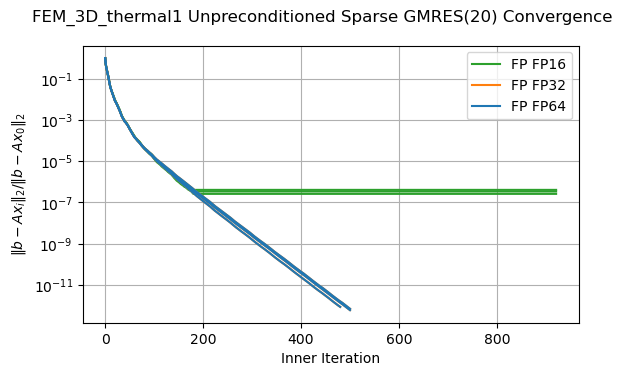

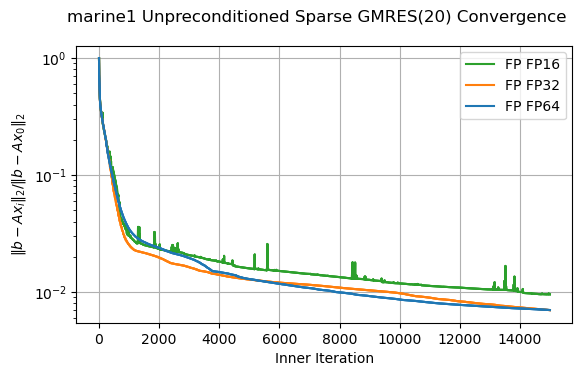

In [5]:
experiments_spec_to_plot = [
    ("FEM_3D_thermal1", "unprecond", 20),
    ("marine1", "unprecond", 20)
]

for matrix, setup, restart_param in experiments_spec_to_plot:

    sub_data = df_sel_setup_matrix_restart(
        extended_data, setup, matrix, restart_param
    )

    fig, ax = plt.subplots(figsize=(6.4, 3.6))

    for fp_solver in FP_SOLVERS:
        plot_data = sub_data[sub_data["solver"] == fp_solver]
        plot_exp_iters_conv_traj(
            ax,
            plot_data,
            N_EXPERIMENT_ITERATIONS,
            fp_solver,
            SOLVER_CLR_DICT[fp_solver]     
        )

    ax.legend()
    ax.grid()
    ax.set_ylabel("$\\|b-Ax_{i}\\|_{2}/\\|b-Ax_{0}\\|_{2}$")
    ax.set_xlabel("Inner Iteration")
    
    fig.suptitle(
        f"{matrix} {SETUP_NAME_MAPPING[setup]} GMRES({restart_param}) Convergence"
    )
    
    # plt.savefig(
    #     os.path.join(support_plot_dir, f"{setup}_{matrix}_{restart_param}.png")
    # )

    plt.show()
    plt.close()
    